In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import zarr
import plotter as plo
from cmcrameri import cm
import pywtt as pw
import scipy.stats
from matplotlib.gridspec import GridSpec
import matplotlib
import CHONK_XL as chxl
from cmcrameri import cm
from matplotlib.gridspec import GridSpec


matplotlib.rc('font', family='Helvetica Neue') 
matplotlib.rc('font', serif='Helvetica Neue') 
matplotlib.rcParams.update({'font.size': 16})

%matplotlib widget
def divide_labels(ax, divider, isint = True, axis = "both"):
    if(axis == "both"):
        onx = True
        ony = True
    elif (axis == "x"):
        onx = True
        ony = False
    elif (axis == "y"):
        onx = False
        ony = True
            
    
    xticks = ax.get_xticks()
    yticks = ax.get_yticks()

    xtickslab = ax.get_xticklabels()
    ytickslab = ax.get_yticklabels()
    if(onx):
        for i in range(len(xticks)):
            xtickslab[i] = str(int(xticks[i]/divider)) if isint else str(xticks[i]/divider)
        ax.set_xticklabels(xtickslab)
    
    if(ony):
        for i in range(len(yticks)):
            ytickslab[i] = str(int(yticks[i]/divider)) if isint else str(yticks[i]/divider)
        ax.set_yticklabels(ytickslab)

In [2]:
ds = xr.open_zarr('section_tooleffect.zarr')
ds.x.values[0] = 0
ds.y.values[0] = 0
ny = ds.ChonkBase__ny.item(0)
nx = ds.ChonkBase__nx.item(0)
dx = ds.ChonkBase__dx.item(0)
dy = ds.ChonkBase__dy.item(0)

extent = [ds.x.min(),ds.x.max(),ds.y.min(), ds.y.max() ]



In [21]:
# Getting the original topo
# input(0)
Ath = 1e7
original = pw.minigraph( nx,  ny,  nx * ny,  dx,  dy, 0, 0, ds.sel({"batch":0}).isel({"otime":-1}).Topography__topography.values.ravel())
# input(1)
original.set_default_boundaries("periodic_EW")
# input(2)
original.compute_graph("carve")
# input(3)
original.calculate_area()
# input(4)
original.d_sources(Ath)
# input(5)
original.compute_all_basins()
# input(6)
original.compute_river_nodes()
# input(7)
original.calculate_junction_map()
# yolo = original.get_rivers_rowcolnode()
# input(8)
oriv = original.get_rivers_dict()
# input(9)
oriv["basin"] = original.get_rivers_basin_label()
# input(10)
oriv["SO"] = original.get_stream_order()
oriv["basarr"] = original.get_basin_array()

JD = original.get_junction_map()

Max area is 5.1388e+08
Ath is 1e+07
Got 1374 river pixels, I had 45 sources
stuffy1


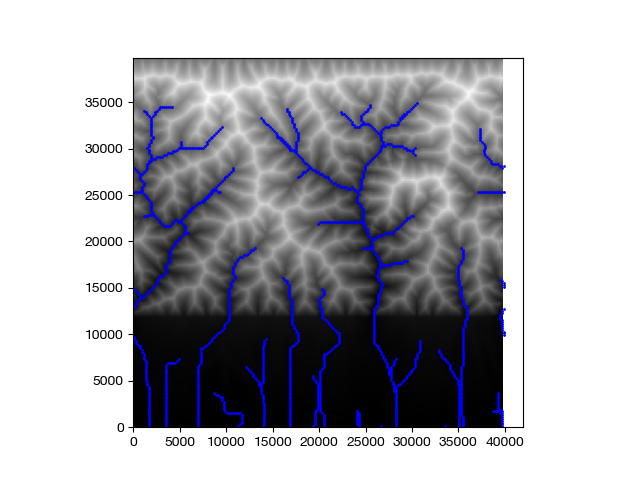

In [22]:
fig, ax = plt.subplots()
ax.imshow(original.get_topo_np().reshape(ny,nx), extent = extent, cmap = "gray")
# ax.imshow(oriv["basarr"].reshape(ny,nx), extent = extent, cmap = "RdBu_r")
cb = ax.scatter(oriv["X"], oriv["Y"], c = "b", lw =0, s = 4)
# cb = ax.scatter(JD["X"], JD["Y"],c = 'k', lw =2, s = 40, marker = "x")

# plt.colorbar(cb)


In [30]:
from ipyfastscape import TopoViz3d


app = TopoViz3d(ds, canvas_height=600, time_dim="otime", elevation_var = "Topography__topography" )

app.show()

Output(layout=Layout(height='640px'))

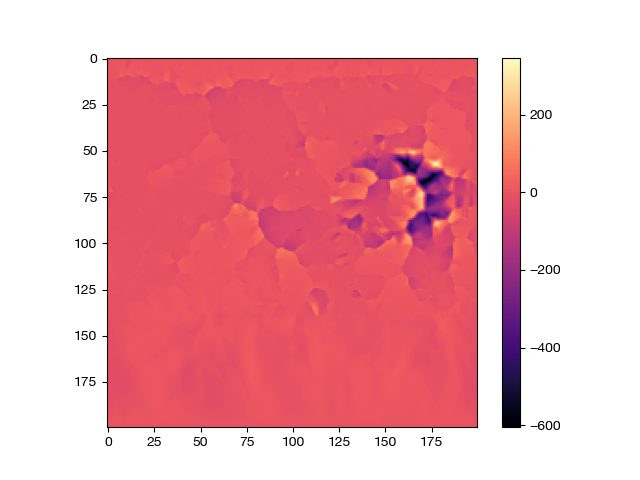

In [26]:
diff = ds.sel({"batch":0}).isel({"otime":-1}).Topography__topography.values - ds.sel({"batch":1}).isel({"otime":-1}).Topography__topography.values
fig, ax = plt.subplots()
cb = ax.imshow(diff,cmap = "magma")
plt.colorbar(cb)

In [29]:
ds.sel({"batch":0}).Fluvial__relative_erosivity_bed.values

array(True)